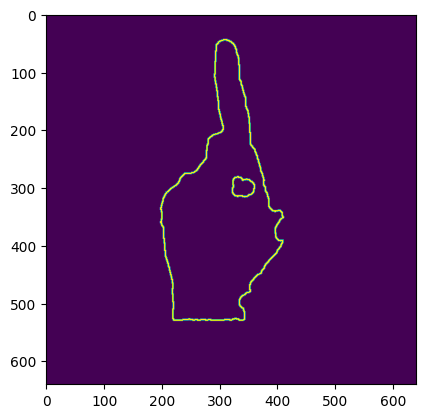

Letter detected from input image:  x


In [79]:
"""
Program Description: ISL-Recognition Program

Development Environment: This program was developed in Visual Studio Code.

Author: Habeeb Alao, Oluwamayowa Adelaja, Ida Bamfi

Created: 25/10/2023    Modified: 22/11/2023
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt 


def isl_detection(I: np.ndarray) -> np.ndarray:
    original_rgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    original_yuv = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
    original_hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    orginal_grayscale = original_yuv[:,:,0]

    min_hsv = np.array([0, 58, 30], dtype = "uint8")
    max_hsv = np.array([33, 255, 255], dtype = "uint8")

    # extract skin region of image
    skin_region_hsv_mask = cv2.inRange(original_hsv, min_hsv, max_hsv)

    # erosion with rect shape
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    mask_erosion = cv2.erode(skin_region_hsv_mask,shape)
    
    # dilation
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    dialated_mask = cv2.dilate(mask_erosion,shape)

    # opening
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,1))
    opened_mask = cv2.morphologyEx(dialated_mask,cv2.MORPH_OPEN,shape)

    # closing
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17,19))
    closed_mask = cv2.morphologyEx(opened_mask,cv2.MORPH_CLOSE,shape)

    # extract edges of the input image
    original_image_edges = cv2.Canny(I,threshold1=220,threshold2=250)

    # extracting boundary of mask
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
    original_boundary = cv2.morphologyEx(closed_mask,cv2.MORPH_GRADIENT,shape)

    # gets the the skin region of orginal using closed mask
    skin_region = cv2.bitwise_and(original_rgb, original_rgb, mask = closed_mask)


    
    plt.imshow(original_boundary)
    plt.show()
    
    return "x"


input_image = cv2.imread('./sample-input.jpg')
All_letters = cv2.imread('./islLetters.jpg')
detected_letter = isl_detection(input_image)
print("Letter detected from input image: ", detected_letter )